In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

In [2]:
# Tempory data frame to pull in the drinks.csv file
temp_df = pd.read_csv("output_data/drinks.csv")

In [3]:
# Display head of data frame. Feel free to delete
temp_df.head()

,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure
0,17222,A1,Cocktail,True,cocktail glass,"['Gin', 'Grand Marnier', 'Lemon Juice', 'Grena...","['1 3/4 shot ', '1 Shot ', '1/4 Shot', '1/8 Sh..."
1,13501,ABC,Shot,True,shot glass,"['Amaretto', 'Baileys irish cream', 'Cognac']","['1/3 ', '1/3 ', '1/3 ']"
2,17225,Ace,Cocktail,True,martini glass,"['Gin', 'Grenadine', 'Heavy cream', 'Milk', 'E...","['2 shots ', '1/2 shot ', '1/2 shot ', '1/2 sh..."
3,17837,Adam,Ordinary Drink,True,cocktail glass,"['Dark rum', 'Lemon juice', 'Grenadine']","['2 oz ', '1 oz ', '1 tsp ']"
4,13938,AT&T,Ordinary Drink,True,highball glass,"['Absolut Vodka', 'Gin', 'Tonic water']","['1 oz ', '1 oz ', '4 oz ']"


In [4]:
# List conversion function. Let me know if there are any issues
def convert(s):
    lst = []
    temp = s.split(", ")
    
    for x in temp:
        lst.append(x.translate({ord(i): None for i in "[']"}))
    
    return lst

In [5]:
# Necessary copy of data frame. The value count is just a test. Feel free to delete that line
drink_df = temp_df.copy()
drink_df['Glass'].value_counts()

cocktail glass         93
highball glass         77
old-fashioned glass    55
collins glass          53
shot glass             26
coffee mug             13
wine glass              7
champagne flute         7
punch bowl              7
hurricane glass         6
irish coffee cup        5
martini glass           4
margarita glass         4
pitcher                 4
nick and nora glass     3
pint glass              3
balloon glass           3
beer mug                3
brandy snifter          3
mason jar               2
beer glass              2
beer pilsner            2
pousse cafe glass       1
copper mug              1
cordial glass           1
coupe glass             1
Name: Glass, dtype: int64

In [6]:
# Creation of main data frame. All plots should use this data (i.e. drink_df)
for i in range(0, len(drink_df)):
    drink_df.at[i,'Ingredients'] = convert(temp_df.loc[i,'Ingredients'])

In [7]:
# Creation of sorted list of tuples. Useful for most used ingredient
ing_count = {}
for i in range(0, len(drink_df)):
    for ing in drink_df.loc[i,'Ingredients']:
        if ing in ing_count:
            ing_count[ing] = ing_count[ing] + 1
        else:
            ing_count[ing] = 1
            
#print(ing_count)
a=sorted(ing_count.items(), key=lambda x: x[1], reverse = True)
print(a)
#print(drink2_df['Ingredients'].to_string())

[('Gin', 72), ('Vodka', 54), ('Sugar', 49), ('Lemon juice', 37), ('Orange juice', 37), ('Lemon', 34), ('Grenadine', 29), ('Ice', 29), ('Light rum', 27), ('Powdered sugar', 26), ('Water', 26), ('Coffee', 24), ('Lime', 24), ('Amaretto', 21), ('Milk', 21), ('Dry Vermouth', 20), ('Kahlua', 19), ('Triple sec', 18), ('Lemon peel', 18), ('Sweet Vermouth', 17), ('Baileys irish cream', 15), ('Rum', 15), ('Tequila', 15), ('Pineapple juice', 14), ('', 14), ('151 proof rum', 13), ('Maraschino cherry', 13), ('Lime juice', 13), ('Scotch', 13), ('Bitters', 13), ('Cherry', 13), ('Brandy', 13), ('Orange', 13), ('Egg white', 12), ('Light cream', 12), ('Lime Juice', 12), ('Carbonated water', 12), ('Dark rum', 11), ('Cranberry juice', 11), ('Ginger ale', 11), ('Nutmeg', 10), ('Mint', 9), ('Bourbon', 9), ('Soda water', 9), ('Coca-Cola', 9), ('Red wine', 9), ('Salt', 8), ('Grand Marnier', 7), ('Club soda', 7), ('Blended whiskey', 7), ('Sambuca', 7), ('Champagne', 7), ('Peach schnapps', 7), ('Sugar syrup', 7

In [8]:
# Creation of new series. Feel free to delete if not needed.

drink_df['Ingredients Count'] = 0
for i in range(0, len(drink_df)):
    drink_df.loc[i,'Ingredients Count'] = len(drink_df.loc[i,'Ingredients'])
drink_df.head()

,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure,Ingredients Count
0,17222,A1,Cocktail,True,cocktail glass,"[Gin, Grand Marnier, Lemon Juice, Grenadine]","['1 3/4 shot ', '1 Shot ', '1/4 Shot', '1/8 Sh...",4
1,13501,ABC,Shot,True,shot glass,"[Amaretto, Baileys irish cream, Cognac]","['1/3 ', '1/3 ', '1/3 ']",3
2,17225,Ace,Cocktail,True,martini glass,"[Gin, Grenadine, Heavy cream, Milk, Egg White]","['2 shots ', '1/2 shot ', '1/2 shot ', '1/2 sh...",5
3,17837,Adam,Ordinary Drink,True,cocktail glass,"[Dark rum, Lemon juice, Grenadine]","['2 oz ', '1 oz ', '1 tsp ']",3
4,13938,AT&T,Ordinary Drink,True,highball glass,"[Absolut Vodka, Gin, Tonic water]","['1 oz ', '1 oz ', '4 oz ']",3


In [9]:
# Phase One Below -- Note these phases can be merged.

In [10]:
liquor_count = pd.DataFrame.from_dict(ing_count, orient='index')
liquor_count.reset_index(level=0, inplace=True)
liquor_count.columns = ['Name','Count']
liquor_count['Name'] = liquor_count['Name'].str.lower()
liquor_count = liquor_count.sort_values(by=['Count'], ascending=False)
liquor_count.to_csv('ingredients_list.csv')

In [11]:
# Phase Two -- Note these phases can be merged.

In [12]:
#df = pd.read_csv("ingredients_list.csv")
#df = df.drop('Unnamed: 0', axis=1)
#df.head(1)

In [13]:
#drink_names = df.Name

In [14]:
# alcoholic = []
# non_alcoholic = []

In [15]:
# Do not un-comment and run this please
# for d in drink_names:
#         answer = input(f"Is {d} alcoholic?\r")
#         if answer == "" or answer == "y":
#             alcoholic.append(d)
#         else:
#             non_alcoholic.append(d)

In [16]:
#alcoholic_df = pd.Series(alcoholic).dropna()
#non_alcoholic_df = pd.Series(non_alcoholic).dropna()

In [17]:
#alcoholic_df.to_csv("alcohol_items.csv", header=True)
#non_alcoholic_df.to_csv("non_alcohol_items.csv", header=True)

In [18]:
# Phase Three -- Note these phases can be merged.

In [19]:
alcoholic_df = pd.read_csv('alcohol_items.csv')
non_alcohol_df = pd.read_csv('non_alcohol_items.csv')
alcoholic_df = alcoholic_df.drop('Unnamed: 0', axis=1)
non_alcohol_df = non_alcohol_df.drop('Unnamed: 0', axis=1)

In [20]:
alcohol_groups = [
    'gin','liqueur','vodka','rum',
    'schnapps','scotch','wine','creme',
    'vermouth','sambuca','whiskey','tequila',
    'absolut','brandy'
]

In [21]:
#converter
for g in alcohol_groups:
    converter = alcoholic_df.loc[alcoholic_df['Names'].str.contains(g), 'Names'] = g

In [22]:
alcohol_names = alcoholic_df.groupby(['Names'])
add_values = alcohol_names['Count'].sum()
alcoholic_df_ = pd.DataFrame(add_values)

In [23]:
alcoholic_df_ = alcoholic_df_.sort_values(by=['Count'], ascending=False).reset_index()

In [24]:
# Do not run this please.
# Categorization = []
# counter = 1
# for n in alcoholic_df_['Names']:
#     categorization = input(f"({counter}/{(len(alcoholic_df_))}) Categorize {n}: ")
#     Categorization.append(categorization)
#     counter += 1

(1/88) Categorize rum: rum
(2/88) Categorize gin: gin
(3/88) Categorize vodka: vodka
(4/88) Categorize vermouth: wine
(5/88) Categorize liqueur: liqueur
(6/88) Categorize brandy: spirit
(7/88) Categorize amaretto: liqueur
(8/88) Categorize triple sec: liqueur
(9/88) Categorize kahlua: liqueur
(10/88) Categorize creme: miscellaneous
(11/88) Categorize whiskey: whiskey
(12/88) Categorize scotch: whiskey
(13/88) Categorize baileys irish cream: miscellaneous
(14/88) Categorize tequila: tequila
(15/88) Categorize wine: wine
(16/88) Categorize schnapps: schnapps
(17/88) Categorize bourbon: whiskey
(18/88) Categorize sambuca: liqueur
(19/88) Categorize blue curacao: liqueur
(20/88) Categorize grand marnier: liqueur
(21/88) Categorize champagne: wine
(22/88) Categorize galliano: liqueur
(23/88) Categorize absolut: vodka
(24/88) Categorize goldschlager: schnapps
(25/88) Categorize port: wine
(26/88) Categorize green chartreuse: liqueur
(27/88) Categorize benedictine: liqueur
(28/88) Categorize 

In [40]:
alcoholic_df_['Category'] = Categorization
alcoholic_df_ = alcoholic_df_.drop(columns=['Names'])
alcoholic_df_

,Count,Category
0,81,rum
1,76,gin
2,61,vodka
3,40,wine
4,33,liqueur
...,...,...
83,1,liqueur
84,1,apertif
85,1,liqueur
86,1,liqueur


In [41]:
alcohol_categories = alcoholic_df_.groupby(['Category'])
add_totals = alcohol_categories['Count'].sum()
alcohol_categories_df = pd.DataFrame(add_totals)

In [42]:
alcohol_categories_df = alcohol_categories_df.sort_values(by=['Count'], ascending=False).reset_index()

In [53]:
alcohol_categories_df

,Category,Count
0,liqueur,163
1,rum,84
2,gin,76
3,wine,71
4,vodka,67
5,whiskey,56
6,spirit,44
7,miscellaneous,41
8,schnapps,18
9,tequila,15


In [44]:
#alcohol_categories_df.to_csv("alcohol_categories.csv")

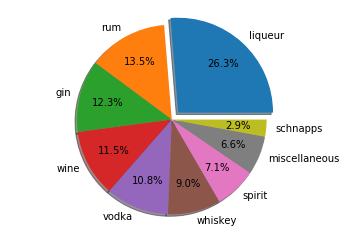

In [79]:
fig1, ax1 = plt.subplots()
ax1.pie(alcohol_categories_df['Count'][0:9], labels=alcohol_categories_df['Category'][0:9], 
        explode=[0.1,0,0,0,0,0,0,0,0], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

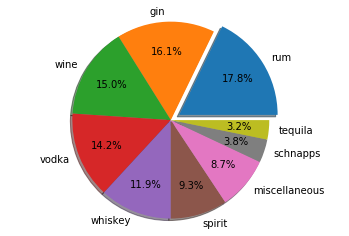

In [78]:
fig1, ax1 = plt.subplots()
ax1.pie(alcohol_categories_df['Count'][1:10], labels=alcohol_categories_df['Category'][1:10], 
        explode=[0.1,0,0,0,0,0,0,0,0], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()